In [1]:
# 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set()

In [2]:
# 데이터 다운로드
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
etf = yf.Tickers(tickers)
data = etf.history(start='2011-01-01', actions=False)
data.drop(['Open', 'High', 'Low', 'Volume'], inplace=True, axis=1)
data = data.droplevel(0, axis=1).resample('M').last()

[*********************100%***********************]  9 of 9 completed


In [3]:
# 수익률 데이터
ret = data.pct_change().dropna()

# 공분산 행렬
cov_mat = ret.cov() * 12

In [4]:
# 공분산 행렬 고윳값 분해
w, v = np.linalg.eig(cov_mat)

In [5]:
v

array([[ 0.38158007, -0.09975457,  0.1087763 , -0.31029358,  0.34135679,
         0.35385702, -0.70222395, -0.03568643, -0.01414336],
       [ 0.52311432,  0.76605771, -0.19499455,  0.29932007, -0.01297768,
         0.09194496,  0.05323103, -0.01164216,  0.01732747],
       [ 0.3796939 ,  0.02634494,  0.15591133, -0.490211  ,  0.31745465,
        -0.61327429,  0.29373469, -0.13719736,  0.09239765],
       [ 0.36253228, -0.11498881,  0.04325777, -0.27710856, -0.79788207,
        -0.08995515, -0.09316367,  0.17006944, -0.30720794],
       [ 0.30424467, -0.33560136,  0.28095225,  0.5351913 ,  0.1086209 ,
        -0.06986365,  0.06884145, -0.42535478, -0.47654774],
       [ 0.17762027, -0.22334113, -0.3901291 , -0.02689846,  0.34188934,
         0.1432951 ,  0.29618318,  0.59977636, -0.4251677 ],
       [ 0.11731566, -0.28577442, -0.76829499,  0.15400366, -0.06062136,
        -0.33621445, -0.27361146, -0.23861748,  0.20508304],
       [ 0.22603586, -0.22245093, -0.15719895, -0.23032634, -0

In [6]:
w

array([0.20385839, 0.03797108, 0.02045597, 0.01200723, 0.00261315,
       0.00721241, 0.00648037, 0.00391603, 0.00483227])

<Axes: >

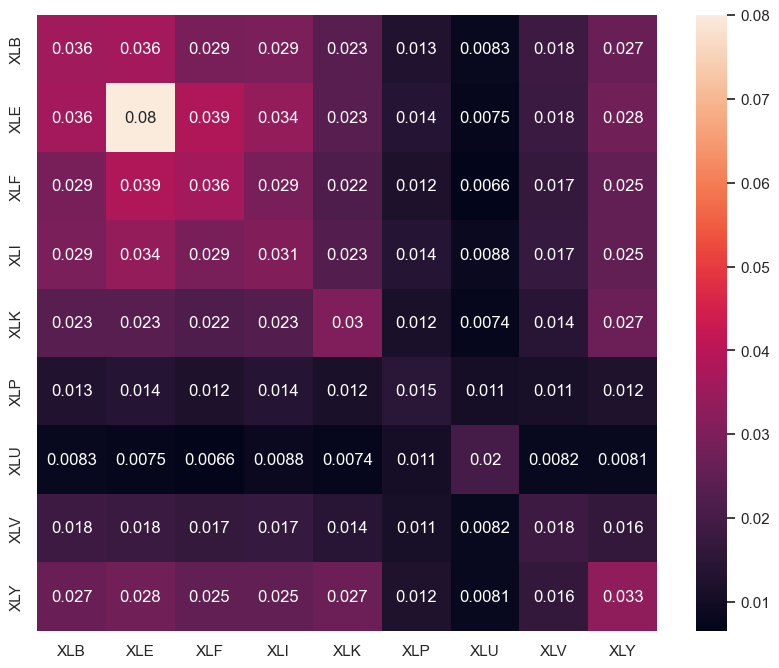

In [7]:
# 공분산 행렬 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(cov_mat, annot=True)

In [8]:
# 공분산 행렬의 역행렬 계산 함수
def inverse_cov_mat(cov_mat, eps=0.05, is_plot=True):

    # 고윳값 분해
    w, v = np.linalg.eig(cov_mat)
    
    # 고윳값이 음수라면 0으로 치환
    if np.where(w >= 0, True, False).sum() != len(w):
        w = np.where(w < 0, 0, w)

    # 유의미하지 않는 고윳값을 0으로 처리
    weighted_w = w / np.sum(w)
    noise_free_w = np.where(weighted_w >= eps, w, 0)

    # 고윳값과 상대적 가중치에 대한 그래프 생성
    if is_plot:
        plt.plot(np.sort(w)[::-1], marker='o', label='eigenvalue')
        plt.plot(np.sort(noise_free_w)[::-1], marker='x', label='updated eigenvalue')
        plt.legend()
        plt.show()

    # 역행렬 계산
    inv_mat = v @ np.diag(np.where(noise_free_w != 0, 1 / noise_free_w, 0)) @ v.T
    new_cov_mat = v @ np.diag(noise_free_w) @ v.T

    return inv_mat, new_cov_mat

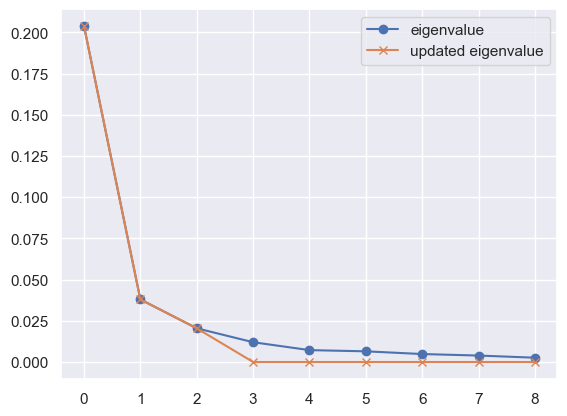

C:\Users\My\AppData\Local\Temp\ipykernel_4348\1452258181.py:23: RuntimeWarning: divide by zero encountered in divide
  inv_mat = v @ np.diag(np.where(noise_free_w != 0, 1 / noise_free_w, 0)) @ v.T


In [9]:
# 업데이트된 공분산 행렬
inv_mat, new_cov_mat = inverse_cov_mat(cov_mat)

<Axes: >

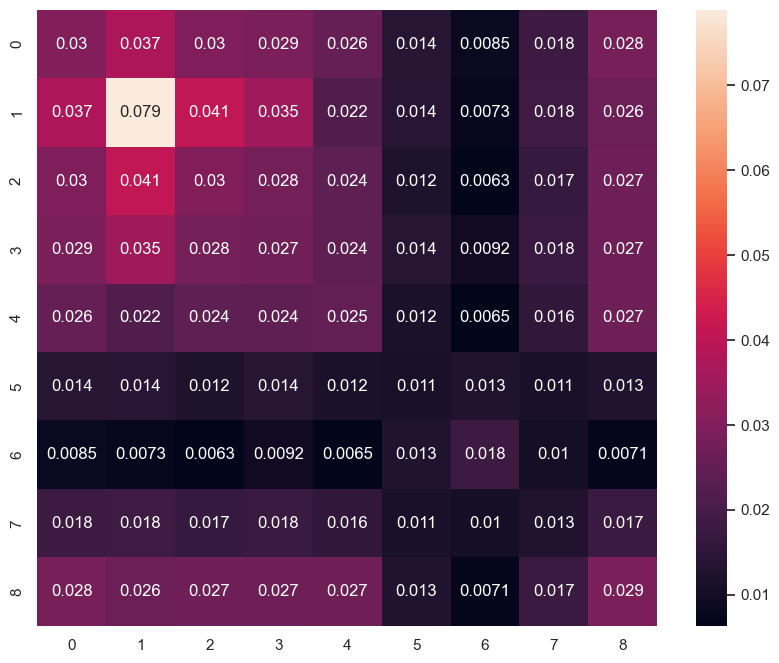

In [10]:
# 공분산 행렬 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(new_cov_mat, annot=True)